In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn import metrics
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('C:\\Users\\LHF\\Desktop\\数据库\\Rdkit_10.csv',encoding='unicode_escape')
X = df.iloc[:, 1:224]
Y = df.iloc[:, 224:]
Y=Y['PCE']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print("X_train's shape is", X_train.shape,"; y_train's shape is", y_train.shape)
X

X_train's shape is (79, 223) ; y_train's shape is (79,)


,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,I,Br,CL,C60,BCP,PC60BM,PCBM,PC61BM,PEAI,ALD-SnO2
0,2.219,734.341,13.458,10.230,11.125,9.061,6.067,7.865,4.574,6.351,...,1.00,0.00,0.0,1,1,0,0,0,0,0
1,2.219,734.341,13.458,10.230,11.125,9.061,6.067,7.865,4.574,6.351,...,1.00,0.00,0.0,1,1,0,0,0,0,0
2,2.219,734.341,13.458,10.230,11.125,9.061,6.067,7.865,4.574,6.351,...,1.00,0.00,0.0,1,1,0,0,0,0,0
3,2.219,734.341,13.458,10.230,11.125,9.061,6.067,7.865,4.574,6.351,...,1.00,0.00,0.0,1,1,0,0,0,0,0
4,2.273,674.271,12.535,9.836,9.836,8.771,5.949,5.949,4.330,4.330,...,1.00,0.00,0.0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.614,1842.863,29.380,23.673,23.673,20.448,13.322,13.322,9.784,9.784,...,0.84,0.16,0.0,1,1,0,0,0,0,0
95,1.411,2189.769,33.363,26.983,26.983,23.414,15.393,15.393,11.361,11.361,...,0.84,0.16,0.0,1,1,0,0,0,0,0
96,1.614,1842.863,29.380,23.673,23.673,20.448,13.322,13.322,9.784,9.784,...,0.84,0.16,0.0,1,1,0,0,0,0,0
97,1.411,2189.769,33.363,26.983,26.983,23.414,15.393,15.393,11.361,11.361,...,0.84,0.16,0.0,1,1,0,0,0,0,0


In [3]:
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

In [4]:
gb_regressor = GradientBoostingRegressor(
    n_estimators=400,        # 树的数量
    learning_rate=0.68,      # 学习率 0.57
    max_depth=3,             # 最大深度
    min_samples_split=2,     # 近似min_child_weight
    min_samples_leaf=1,      # 叶节点最小样本数
    max_features=None,       # 近似colsample_bytree
    subsample=1,           # 行采样比例
    alpha=0.9,               # 分位数损失参数(近似reg_alpha)
    loss='squared_error',    # 损失函数
    random_state=5
)
model = gb_regressor

In [5]:
gb_regressor.fit(X_train_stand, y_train)
y_train_hat = gb_regressor.predict(X_train_stand)
y_test_hat = gb_regressor.predict(X_test_stand)

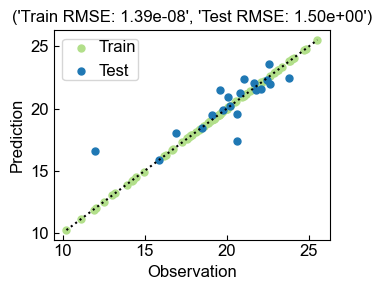

In [6]:
fontsize = 12
plt.figure(figsize=(3.5,3))
plt.style.use('default')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rcParams['font.family']="Arial"
a = plt.scatter(y_train, y_train_hat, s=25,c='#b2df8a')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k:', lw=1.5)
plt.xlabel('Observation', fontsize=fontsize)
plt.ylabel('Prediction', fontsize=fontsize)
plt.tick_params(direction='in')
plt.title(('Train RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))),\
              'Test RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))), fontsize=fontsize)
b = plt.scatter(y_test, y_test_hat, s=25,c='#1f78b4')
plt.legend((a,b),('Train','Test'),fontsize=fontsize,handletextpad=0.1,borderpad=0.1)
plt.rcParams['font.family']="Arial"
plt.tight_layout()
plt.show()

In [7]:
np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))

1.394197348501659e-08

In [8]:
np.sqrt(metrics.mean_squared_error(y_test, y_test_hat))

1.4980191217612455

In [9]:
metrics.mean_absolute_error(y_test, y_test_hat)

0.9815550748715204

In [10]:
import sklearn.metrics as metrics
from scipy.stats.stats import pearsonr

# Defining Metrics
def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
#计算R²分数（R-squared score），也被称为决定系数，它衡量了回归模型对目标变量的方差解释比例。
#参数 X 和 Y 是两个数组，分别表示模型的预测值和实际目标值。

def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr
#计算Pearson相关系数，衡量了两个变量之间的线性关系强度和方向。

In [11]:
PearsonCoefficient(y_test,y_test_hat)

0.831200981647508

In [12]:
PearsonCoefficient(y_train,y_train_hat)

0.9999999999999999

In [13]:
R2Score(y_test,y_test_hat)

0.68020280500192

In [14]:
R2Score(y_train,y_train_hat)

1.0

In [15]:
df1 = pd.read_csv('C:\\Users\\LHF\\Desktop\\yanzheng\\Rdkit_yanzheng_10.csv',encoding='unicode_escape')
X1 = df1.iloc[:, 1:224]
Y1 = df1.iloc[:, 224:]
Y1=Y1['PCE']
X1_stand = scaler.transform(X1)
prediction = gb_regressor.predict(X1_stand)

error = (prediction - Y1).abs()


prediction_df = pd.DataFrame({'Prediction': prediction.round(2), 'True': Y1.round(2), 'Error': error.round(2)})
prediction_df.to_csv('C:\\Users\\LHF\\Desktop\\yanzheng\\GB_Rdkit_yanzheng_result_10.csv', index=False)
Y1

0     24.36
1     22.78
2     26.90
3     23.13
4     23.54
5     22.13
6     23.00
7     24.70
8     25.50
9     26.20
10    26.35
11    26.11
12    25.40
Name: PCE, dtype: float64

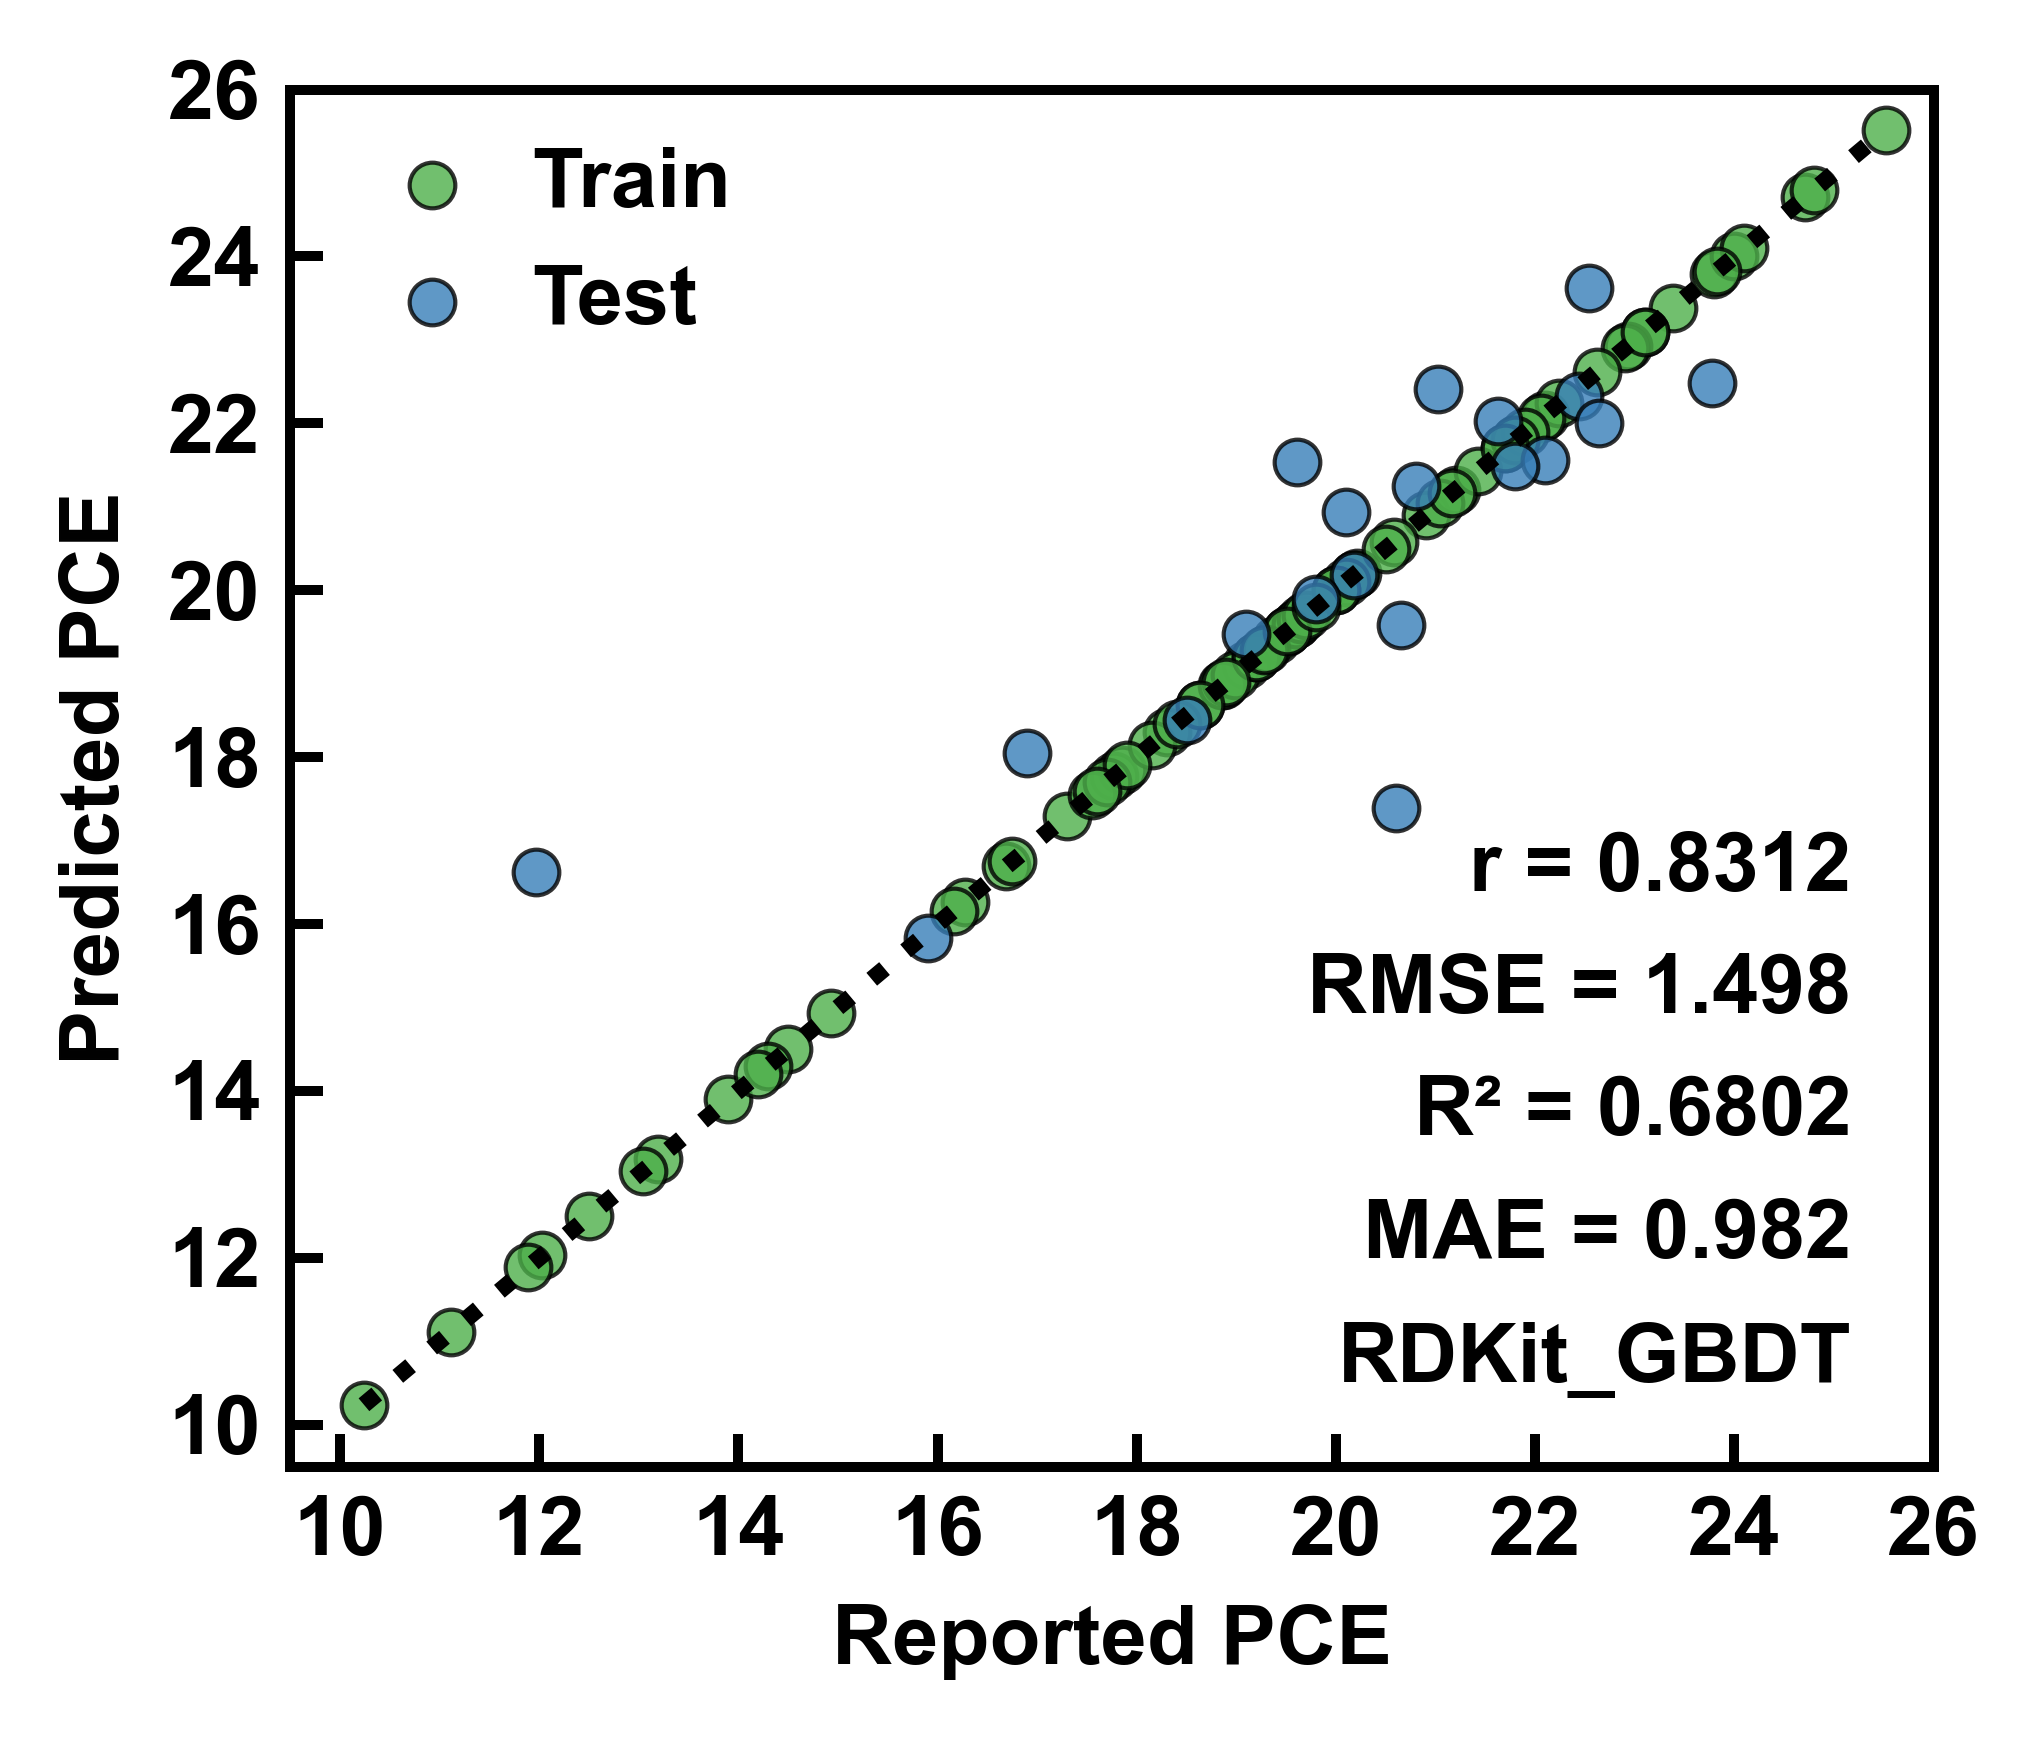

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from pathlib import Path  # 用于更安全的路径处理

# 全局样式设置
plt.rcParams.update({
    'axes.linewidth': 1.2,      # 坐标轴线宽（统一边框粗细）
    'lines.linewidth': 2,       # 线条宽度
    'lines.markersize': 8,      # 标记大小
    'xtick.major.width': 1.2,   # x轴主刻度线宽（与边框一致）
    'ytick.major.width': 1.2,   # y轴主刻度线宽（与边框一致）
    'font.family': 'Arial',
    'font.weight': 'bold'
})

# 创建图形对象
fontsize = 10
fig, ax = plt.subplots(figsize=(3.5, 3), dpi=600)

# 颜色定义
train_color = '#4daf4a'
test_color = '#377eb8'
line_color = 'k'

# ========== 数据绘制部分 ==========
# 请确保 y_train, y_train_hat, y_test, y_test_hat 已定义
# 绘制散点图
ax.scatter(y_train, y_train_hat, s=30, c=train_color, label='Train', 
           alpha=0.8, edgecolors='k', linewidths=0.5)
ax.scatter(y_test, y_test_hat, s=30, c=test_color, label='Test', 
           alpha=0.8, edgecolors='k', linewidths=0.5)

# 参考线
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
ax.plot([min_val, max_val], [min_val, max_val], 
        color=line_color, linestyle=':', lw=2)

# ========== 坐标轴设置 ==========
ax.set_xlabel('Reported PCE', fontsize=fontsize, fontweight='bold')
ax.set_ylabel('Predicted PCE', fontsize=fontsize, fontweight='bold')

# 刻度设置
ax.tick_params(
    axis='both',
    direction='in',
    which='major',
    length=4,
    width=1.2,
    top=False,
    right=False,
    labelsize=fontsize
)

# 边框设置
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color('black')

# 刻度范围设置
x_min = 2 * np.floor(min_val / 2) if min_val > 0 else 0
x_max = 2 * np.ceil(max_val / 2)
x_ticks = np.arange(x_min, x_max + 2, 2)
ax.set_xlim(x_min - 0.5, x_ticks[-1])
ax.set_ylim(x_min - 0.5, x_ticks[-1])
ax.set_xticks(x_ticks)
ax.set_yticks(x_ticks)

# ========== 添加统计指标 ==========
# 请确保 PearsonCoefficient 和 R2Score 函数已定义
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_hat))
r_test = PearsonCoefficient(y_test, y_test_hat)
r2_test = R2Score(y_test, y_test_hat)
mae_test = 0.982  # 添加MAE值

# 修改文本内容，在R²下面添加MAE
metrics_text = f'r = {r_test:.4f}\nRMSE = {rmse_test:.3f}\nR² = {r2_test:.4f}\nMAE = {mae_test:.3f}\nRDKit_GBDT'
ax.text(0.95, 0.05, metrics_text, 
        transform=ax.transAxes,
        fontsize=fontsize, 
        fontweight='bold',
        verticalalignment='bottom',
        horizontalalignment='right',
        linespacing=1.8)

# 图例设置
ax.legend(fontsize=fontsize, handletextpad=0.2, borderpad=0.2, frameon=False)

# ========== 保存图片 ==========
plt.tight_layout()

# 保存图片（必须在 show() 之前）
output_path = Path('C:/Users/LHF/Desktop/论文图/9_1.png')
output_path.parent.mkdir(parents=True, exist_ok=True)  # 确保目录存在

plt.savefig(
    output_path,
    dpi=600,
    bbox_inches='tight',
    pad_inches=0.05,
    facecolor='white',
    transparent=False
)

# 显示图形（可选）
plt.show()

# 关闭图形
plt.close()

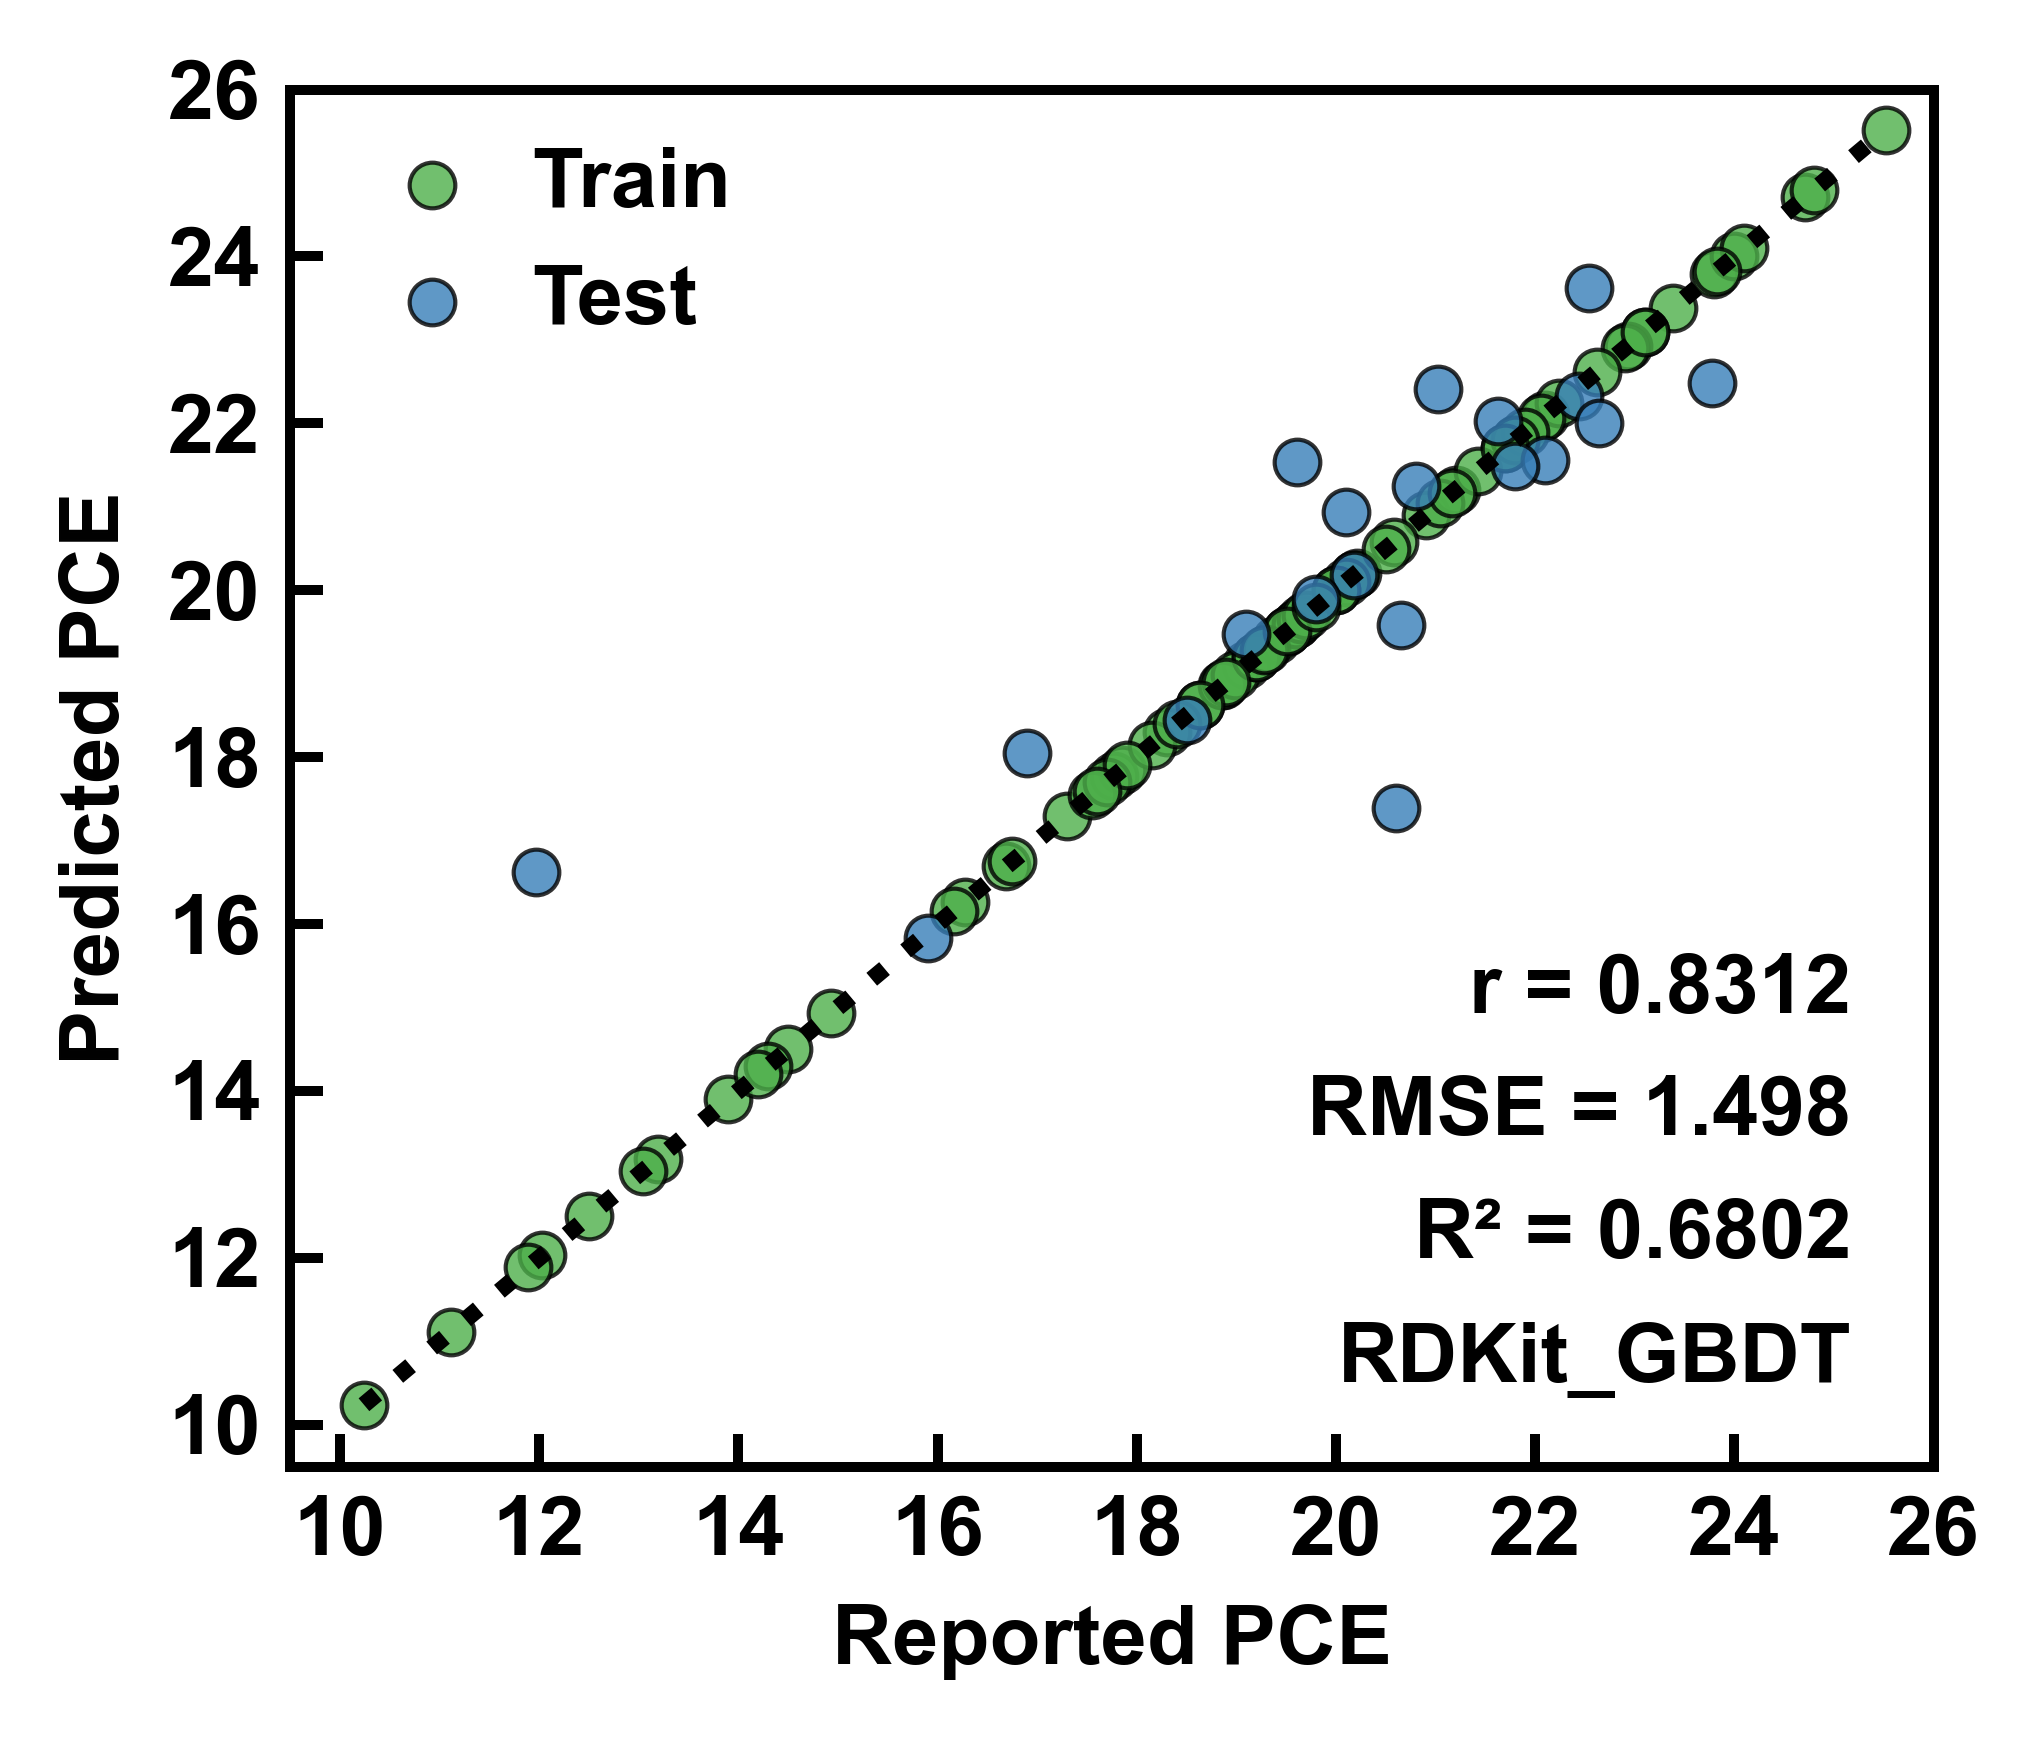

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from pathlib import Path  # 用于更安全的路径处理

# 全局样式设置
plt.rcParams.update({
    'axes.linewidth': 1.2,      # 坐标轴线宽（统一边框粗细）
    'lines.linewidth': 2,       # 线条宽度
    'lines.markersize': 8,      # 标记大小
    'xtick.major.width': 1.2,   # x轴主刻度线宽（与边框一致）
    'ytick.major.width': 1.2,   # y轴主刻度线宽（与边框一致）
    'font.family': 'Arial',
    'font.weight': 'bold'
})

# 创建图形对象
fontsize = 10
fig, ax = plt.subplots(figsize=(3.5, 3), dpi=600)

# 颜色定义
train_color = '#4daf4a'
test_color = '#377eb8'
line_color = 'k'

# ========== 数据绘制部分 ==========
# 请确保 y_train, y_train_hat, y_test, y_test_hat 已定义
# 绘制散点图
ax.scatter(y_train, y_train_hat, s=30, c=train_color, label='Train', 
           alpha=0.8, edgecolors='k', linewidths=0.5)
ax.scatter(y_test, y_test_hat, s=30, c=test_color, label='Test', 
           alpha=0.8, edgecolors='k', linewidths=0.5)

# 参考线
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
ax.plot([min_val, max_val], [min_val, max_val], 
        color=line_color, linestyle=':', lw=2)

# ========== 坐标轴设置 ==========
ax.set_xlabel('Reported PCE', fontsize=fontsize, fontweight='bold')
ax.set_ylabel('Predicted PCE', fontsize=fontsize, fontweight='bold')

# 刻度设置
ax.tick_params(
    axis='both',
    direction='in',
    which='major',
    length=4,
    width=1.2,
    top=False,
    right=False,
    labelsize=fontsize
)

# 边框设置
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color('black')

# 刻度范围设置
x_min = 2 * np.floor(min_val / 2) if min_val > 0 else 0
x_max = 2 * np.ceil(max_val / 2)
x_ticks = np.arange(x_min, x_max + 2, 2)
ax.set_xlim(x_min - 0.5, x_ticks[-1])
ax.set_ylim(x_min - 0.5, x_ticks[-1])
ax.set_xticks(x_ticks)
ax.set_yticks(x_ticks)

# ========== 添加统计指标 ==========
# 请确保 PearsonCoefficient 和 R2Score 函数已定义
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_hat))
r_test = PearsonCoefficient(y_test, y_test_hat)
r2_test = R2Score(y_test, y_test_hat)

metrics_text = f'r = {r_test:.4f}\nRMSE = {rmse_test:.3f}\nR² = {r2_test:.4f}\nRDKit_GBDT'
ax.text(0.95, 0.05, metrics_text, 
        transform=ax.transAxes,
        fontsize=fontsize, 
        fontweight='bold',
        verticalalignment='bottom',
        horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', pad=0.4),
        linespacing=1.8)

# 图例设置
ax.legend(fontsize=fontsize, handletextpad=0.2, borderpad=0.2, frameon=False)

# ========== 保存图片 ==========
plt.tight_layout()

# 保存图片（必须在 show() 之前）
output_path = Path('C:/Users/LHF/Desktop/论文图/9.png')
output_path.parent.mkdir(parents=True, exist_ok=True)  # 确保目录存在

plt.savefig(
    output_path,
    dpi=600,
    bbox_inches='tight',
    pad_inches=0.05,
    facecolor='white',
    transparent=False
)

# 显示图形（可选）
plt.show()

# 关闭图形
plt.close()